<a href="https://colab.research.google.com/github/nhs-pycom/coding-club/blob/main/introduction-to-python/episode-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

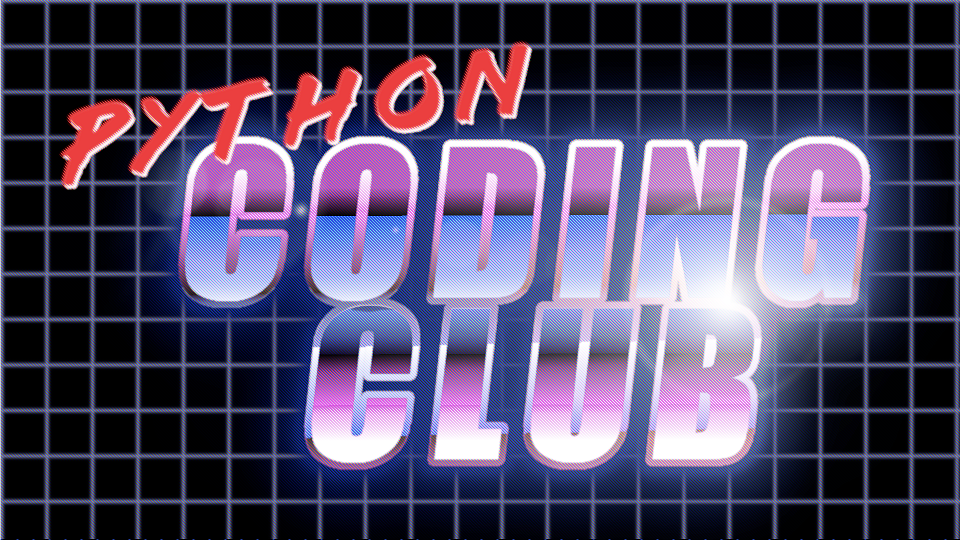

#**Intro to Python 7: Custom Classes**
Notebook by: Chris Todd

This session will introduce the concept of classes and objects, and how we can create custom classes to improve our code. 

This approach of focusing on objects rather than functions is sometimes referred to as **Object Oriented Programming** (OOP). We will introduce two of the key concepts within OOP: **encapsulation** and **inheritance**. 

Even if you don't ever create a custom class, understanding a little about how classes and objects operate under the hood will help you in day to day Python use. 


#**Class Basics**
The term class is used  interchangably with **type** or **datatype**.

Almost everything you create in python is an **object**, and all of these objects are an instance of a **class**. 

Python has several built in classes, such as integers, dictionaries and lists. Importing packages gives you access to additional classes, for example Pandas allows you to use the DataFrame and Series classes. 


In [ ]:
#create a dictionary
x = {'a': 1, 'b': 2, 'c':3}

print(type(x))

Here we have created an object, x, which is an instance of the **dict** class. We can check the class of the object using the `type()` function.

Classes possess **attributes**. These attributes can be either **datapoints** or **methods**. A method is a function that is attached to a specific class. 

We can access these attributes using the dot operator like this `object.attribute`.

For example, one attribute of the dictionary object is the `values()` method, which returns all the values from the key/value pairs in the dictionary object. 

In [ ]:
x.values()

As `values()` is a method of the dictionary class, you cannot call it as a standalone function, or as a method of another class. It is tied to the dictionary class. 

In [ ]:
#If we try to call values as a method of this list object, it returns an error
y = [1, 2, 3]

y.values()

However, **beware** that it is possible for different classes to have methods with the same name that behave differently.

For example, the list and datafame classes both have an `append()` method, but the list operates in place, whereas the dataframe must be assigned. 

# **Custom Classes**
In addition to the classes that we can use in base python and packages that we import, we can also create our own custom classes. 

When creating a custom class, it can be helpful to think of it as a real world object, and what properties and actions you would assocate it. 


The syntax below is to make a new class called dog_class. We have given it four attributes, consisting of three datapoints and a method. 

Notice that we create a method like a regular function, but nested inside of the class definition. 

I have added **class** to the end of the class name here. This is just to help us differentiate between classes and objects, and is not a normal naming convetion. 

In [ ]:
from random import randint

In [ ]:
class dog_class:
  name = 'Bark Twain'
  weight = 10.5
  slobber = True
  def bark(self):
    b = randint(1, 20)
    print('WOOF! ' * b)

An important point to note there is the use of `self`. Whenever an object calls one of its methods, the object itself is passed as the first argument. `self` represents the object the method is being called on. You don't need to actually pass it as an argument when you use the method, as it is passed implicitly.

We can now create an instace of this class, access its attributes and update them. 

In [ ]:
dog_object = dog_class()

#print the attribute name
print(dog_object.name)

#change the weight attribute then print it
dog_object.weight = 11.2
print(dog_object.weight)

We can also call the method we created to bark, which prints WOOF! a random number of times. 

In [ ]:
dog_object.bark()

In [ ]:
#**Excercise 1:**
#Create a custom class with at least three datapoints and a method. Extra points for creativity. 
#Suggestions if you can't think of anything - robot, ship, hospital, movie, country...



# **Methods and Private Members**
Lets touch on the concept of **encapsulation**. This is the notion of data and functionality being contained within an object, and accessible in predefined and controlled ways. 

We have collected some datapoints and methods together in our dog class, but they can be directly accessed and updated to anything. 

We can implement some control over this by making the attributes private, and adding methods to interact with them. 

In [ ]:
class dog_class:
  #adding a double underscore to the start of an attribute defines it as a 'private member', which can no longer be accessed directly
  __name = 'Bark Twain'
  weight = 10.5
  slobber = True
  def bark(self):
    b = randint(0, 10)
    print('WOOF! ' * b)

In [ ]:
dog_object = dog_class()

dog_object.__name

`__name` can no longer be accessed directly*. 

Now lets add a method that allows the name to be viewed, and one that allows it to be updated. Note that the `update_name` method allows us to specficy what datatype can be entered.

In [ ]:
class dog_class:
  _name = 'Bark Twain'
  weight = 10.5
  slobber = True
  def bark(self):
    b = randint(0, 10)
    print('WOOF! ' * b)
  #update_name method added to change the attribute
  def update_name(self, new_name: str):
    self.name = new_name
  #View_name method to see name of object
  def view_name(self):
    print(self.name)

In [ ]:
#create an object with the updated dog class
dog_object = dog_class()

#Use the new method to update the name attribute
dog_object.update_name('Virginia Woof')

dog_object.view_name()

We have succesfully encapsulated the the datapoints and methods for this class, and have controlled how to interact with it. We could do the same for the remaining attributes . 

In [ ]:
#**Excercise 2:**
#Encapsulate one of your attributes, by making it a private member, and add a method to view and update it. 



*CAVEAT: *Private members are not truly private, their name has just been 'mangled', and they can be easily accessed if you really want to. Marking something as private or non-public in Python is only really an indication of intent by the programmer. See the Python documenation [here](https://https://docs.python.org/3/tutorial/classes.html#private-variables) for more details.*

# **The Contructor Method**

We now have a class, but new instances of it always start with the same attributes, and have to be updated after the object has been instantiated. It would be more intuitive to define the attributes  of an object as we create it. 

To do this, We can add the `__init()__` method to the class, also known as the class constructor. This allows us to specify what arguments we require when the class is instantiated, and what attributes of the object to assign them to. 

The `__init()__` method also allows us to specify what datatype each of those arguments should be.  

Notice that we are now using `self` when assigning value to the attributes. This is because now we assigning those values to the specific **object** being created, not the class.

In [ ]:
class dog_class:
  #init method. The attributes we assigned previously are now part of this method
  def __init__(self, name: str, weight: float, slobber: bool):
    self.__name = name
    self.weight = weight
    self.slobber = slobber
  def bark(self):
    b = randint(0, 10)
    print('WOOF! ' * b)
  def update_name(self, new_name: str):
    self.name = new_name
  def view_name(self):
    print(self.__name)

In [ ]:
#lets now create an instance of our new class by passing arguments
dog_object = dog_class('Groucho Barks', 10.5, True)

dog_object.view_name()

In [ ]:
# **excercise 3:**
#add the contsructor method to your class and create an instance of it



#**Dunder Methods**

When we added the `__init__` method to the previous class, you may have noticed a couple of things. We didn't get to pick its name as we did with the `bark()` method, and it is surrounded by two underscores on each side. 

This is becuase `__init__` is a dunder (double underscore) or magic method. These are special perdefined methods that allow you to give your custom class special functionality that the native datatypes have.  

The `dir()` function will list all attributes of an object, and we can see all the dunder methods that are initially assoicated with our custom class.







In [ ]:
#This shows us all of the attributes of a method. As we can see there are the atrributes we defined at the bottom, but above that, lots of dunder methods.
#I couldn't find any documentation on this, but it appears that certain ones are added by default to a new class, some of which have a default implementation, which may or may not work, and some are simply undefined. There are many more in Python that aren't on this list tough. 

dir(dog_object)

One of the most useful things dunder methods allow us to do is define how standard operators behave with ourclass (this is known as 'operator overloading').

For example, when we test two objects for equality using `==`, what does python actually do? It calls the `__eq__` dunder method which tells it how to compare two objects of a class. Obvious when its two integers, but not so much when it is a more complex class. If it is an array do you compare the length? Or element-wise? 

This is useful as it allows us to tell Python how our class should be compared, and then compare it using the same syntax as a native data class. 


However, the initial implementation of `__eq__` method simply checks if two objects are literally the same object in memory.

Not very useful for our dog class, so lets overwrite it to something more meaningful...


In [ ]:
class dog_class:
  def __init__(self, name: str, weight: float, slobber: bool):
    self._name = name
    self.slobber = slobber
    self.weight = weight
  def bark(self):
    b = randint(0, 10)
    print('WOOF! ' * b)
  def update_name(self, new_name: str):
    self.name = new_name
  def view_name(self):
    print(self._name)
  def __eq__(self, other: object):
    if type(self) == type(other):
        return self.weight == other.weight

We have now updated the method so that when `== ` is called, and both objects 
are dog class, it will return true if their weight attributes are equal. Lets see if it works:

In [ ]:
dog_object1 = dog_class('Groucho Barks', 10.5, True)
dog_object2 = dog_class('Virginia Woof', 10.5, True)
dog_object3 = dog_class('Dogstoyevsky', 12.2, True)

print(dog_object1 == dog_object2)

print(dog_object1 == dog_object3)

#Success. The dogs with the same weight returned true, the dogs with different weights returned false. 

Lets do the same for the `__repr__` method. This tells python what to return when you pass an object to the print function. 

By default it just returns the memory address:

In [ ]:
print(dog_object1)

Lets overwrite this default to print something more useful.

In [ ]:
class dog_class:
  def __init__(self, name: str, weight: float, slobber: bool):
    self._name = name
    self.weight = weight
    self.slobber = slobber
  def bark(self):
    b = randint(0, 10)
    print('WOOF! ' * b)
  def update_name(self, new_name: str):
    self.name = new_name
  def view_name(self):
    print(self._name)
  def __eq__(self, other: object):
    if type(self) == type(other):
        return self.weight == other.weight
  def __repr__(self):
    return self._name + " is a dog that weights " + str(self.weight) +"kg" + (" and slobbers." if self.slobber else ".")

dog_object1 = dog_class('Groucho Barks', 10.5, False)

print(dog_object1)

Many other operators fall in to this category:

*  `>` calls the `__gt__` magic method
*   `<` calls the `__lt__` magic method
*   `+` calls the `__add__` magic method
*   `len()` calls the `__len__` magic method

Defining these methods for our custom class allows us to use these standard operators with our object in a way that is meaningful and consistent with native data classes.

In [ ]:
# **Excercise 4: **
#Update a dunder class. Use == or print(), or one of the ones we haven't looked at if you are feeling adventurous.



# Inheritance

Inheritance is another key concept in OOP, and is the notion that classes can have **sub-classes** that inherit the properties of the **super-class**. Another way of thinking of it is parent class and child class. 

Think of it in terms of a sub-class being a more specific version of the super-class, e.g. humans are a sub-class of mammals. In our example, we use police dogs as a sub-class of dogs. 

This can be useful in a several ways. Firstly, we don't have to repeat the code already written as part of the super-class, we can just inherit it. Secondly, changes made to a super-class are are cascaded to sub-classes. 

In [ ]:
#we can create a sub-class by passing the super-class as an argument when defining the sub-class. In this case, the sub-class will inherit everything from super-class. 
class police_dog_class(dog_class):
  pass

However, making an identical sub-class doens't help us much. In most cases, we would want to inherit the attributes of the parent class, whilst adding new ones. 

In this example below, we are instructing it to inherit the attributes from `dog_class` so we don't have to repeat the contents  of the `dog_class.__init__` method. However, we are also adding a `rank` attribute, and updating the `__repr__` method to inlcude it. 

In [ ]:
class police_dog_class(dog_class):
  def __init__(self, name: str, weight: float, slobber: bool, rank: str):
    super().__init__(name, weight, slobber)
    self.rank = rank  
  def __repr__(self):
    return self.rank + " " + self._name + " is a dog that weights " + str(self.weight) +"kg" + (" and slobbers." if self.slobber else ".")

police_dog_object = police_dog_class('Frank Columbone', 14, True, 'Leuitenant')

print(police_dog_object)


If we use `isinstance()` to check the class, we can see Python regards it as both a `dog_class` and `police_dog_class`.

In [ ]:
print(isinstance(police_dog_object, dog_class))
print(isinstance(police_dog_object, police_dog_class))

In [ ]:
#We can also confirm that changesto the dog_class are inherited, but changing the bark() method, and checking it applies to our police dog
police_dog_object.bark()

In [ ]:
# **Final Excercise:**
#Create a subclass of your own. Add at least one new attribute, and modify an existing method. 



# Further Reading

This is the end of this session, but there is a lot more on custom classes and OOP to dig into. A suggested next step would be to dig in to the other concepts of OOP besides encapculation, which are **abstraction** and **polymorphism**. A good resource for this can be found [here](https://www.educative.io/blog/object-oriented-programming#four.)

The offical Python documenation around classes can be found [here](https://docs.python.org/3/tutorial/classes.html#).